In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
train_Demographics = pd.read_csv('./data (1)/data/Training/train_Demographics.csv')
train_Demographics.head() 

,id,age_yrs,ethnic_group,gender_identity,weight_kg,height_cm,body_mass_index
0,246060.0,77.0,Caucasian,F,70.2,160.0,27.421875
1,276985.0,25.0,Caucasian,F,95.3,172.7,31.952749
2,262220.0,81.0,Caucasian,F,61.7,165.1,22.635548
3,201746.0,19.0,Caucasian,M,NaN,188.0,NaN
4,182697.0,67.0,Caucasian,M,100.0,190.5,27.555611


In [3]:
# Convert 'gender_identity' to a numerical feature using pandas get_dummies
# Assuming 'gender_identity_M' is derived from a 'gender_identity' column that no longer exists in the DataFrame
# If 'gender_identity' exists and contains the original gender identities, use it to create numerical features

# Check if 'gender_identity' exists in the DataFrame; if not, we assume 'gender_identity_M' is the binary representation
if 'gender_identity' in train_Demographics.columns: 
    train_Demographics = pd.get_dummies(train_Demographics, columns=['gender_identity'], drop_first=True)
else:
    # Assuming 'gender_identity_M' is already the binary representation where 1 represents Male and 0 represents Female or Other
    # No action needed if 'gender_identity_M' is the desired numerical feature
    print("'gender_identity' column not found. 'gender_identity_M' is already a numerical feature representing Male.")

# Display the first few rows to verify the transformation
train_Demographics.head()

,id,age_yrs,ethnic_group,weight_kg,height_cm,body_mass_index,gender_identity_M,gender_identity_female,gender_identity_male
0,246060.0,77.0,Caucasian,70.2,160.0,27.421875,0,0,0
1,276985.0,25.0,Caucasian,95.3,172.7,31.952749,0,0,0
2,262220.0,81.0,Caucasian,61.7,165.1,22.635548,0,0,0
3,201746.0,19.0,Caucasian,NaN,188.0,NaN,1,0,0
4,182697.0,67.0,Caucasian,100.0,190.5,27.555611,1,0,0


In [4]:
# missing values train_df
train_Demographics.isnull().sum()
cleaned_train_Demographics=train_Demographics.dropna()
cleaned_train_Demographics.shape,train_Demographics.shape 




((95651, 9), (104125, 9))

In [5]:
# Convert 'ethnic_group' to a numerical feature using pandas get_dummies
train_Demographics = pd.get_dummies(train_Demographics, columns=['ethnic_group'], drop_first=True)

# Display the first few rows to verify the transformation
train_Demographics.head()

,id,age_yrs,weight_kg,height_cm,body_mass_index,gender_identity_M,gender_identity_female,gender_identity_male,ethnic_group_African American,ethnic_group_Asian,ethnic_group_Caucasian,ethnic_group_Hipanic,ethnic_group_Hispanic,ethnic_group_Native American,ethnic_group_Other/Unknown
0,246060.0,77.0,70.2,160.0,27.421875,0,0,0,0,0,1,0,0,0,0
1,276985.0,25.0,95.3,172.7,31.952749,0,0,0,0,0,1,0,0,0,0
2,262220.0,81.0,61.7,165.1,22.635548,0,0,0,0,0,1,0,0,0,0
3,201746.0,19.0,NaN,188.0,NaN,1,0,0,0,0,1,0,0,0,0
4,182697.0,67.0,100.0,190.5,27.555611,1,0,0,0,0,1,0,0,0,0


In [6]:
missing_rate = train_Demographics.isnull().sum() / len(train_Demographics)
missing_rate

id                               0.000000
age_yrs                          0.038214
weight_kg                        0.026766
height_cm                        0.015712
body_mass_index                  0.034430
gender_identity_M                0.000000
gender_identity_female           0.000000
gender_identity_male             0.000000
ethnic_group_African American    0.000000
ethnic_group_Asian               0.000000
ethnic_group_Caucasian           0.000000
ethnic_group_Hipanic             0.000000
ethnic_group_Hispanic            0.000000
ethnic_group_Native American     0.000000
ethnic_group_Other/Unknown       0.000000
dtype: float64

In [7]:
from sklearn.impute import SimpleImputer

# Imputing missing values in 'train_Demographics' dataframe
imputer = SimpleImputer(strategy='mean')

# Columns to impute
columns_to_impute = ['age_yrs', 'weight_kg', 'height_cm', 'body_mass_index']

# Applying imputation
train_Demographics[columns_to_impute] = imputer.fit_transform(train_Demographics[columns_to_impute])

# Checking if there are any missing values left
train_Demographics.isnull().sum()

id                               0
age_yrs                          0
weight_kg                        0
height_cm                        0
body_mass_index                  0
gender_identity_M                0
gender_identity_female           0
gender_identity_male             0
ethnic_group_African American    0
ethnic_group_Asian               0
ethnic_group_Caucasian           0
ethnic_group_Hipanic             0
ethnic_group_Hispanic            0
ethnic_group_Native American     0
ethnic_group_Other/Unknown       0
dtype: int64

In [8]:
import pandas as pd

# Reading the train_Laboratory_Findings.csv into train_Laboratory_Findings dataframe
train_Laboratory_Findings = pd.read_csv('./data (1)/data/Training/train_Laboratory_Findings.csv')
train_Laboratory_Findings.head()


,id,OBS1_albumin_max,OBS1_albumin_min,OBS2_albumin_max,OBS2_albumin_min,OBS1_bilirubin_max,OBS1_bilirubin_min,OBS2_bilirubin_max,OBS2_bilirubin_min,OBS1_bun_max,...,OBS2_glucose_max,OBS2_glucose_min,OBS1_hematocrit_max,OBS1_hematocrit_min,OBS2_hematocrit_max,OBS2_hematocrit_min,OBS1_sodium_max,OBS1_sodium_min,OBS2_sodium_max,OBS2_sodium_min
0,246060,1.6,1.6,NaN,NaN,0.5,0.5,NaN,NaN,11.0,...,145.0,143.0,36.9,36.1,36.9,36.9,145.0,145.0,145.0,145.0
1,276985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,262220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,34.0,25.9,34.0,34.0,NaN,NaN,NaN,NaN
3,201746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,182697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,44.2,44.2,NaN,NaN,137.0,137.0,NaN,NaN


In [9]:
from sklearn.impute import SimpleImputer

# Creating an imputer object with a strategy of mean to fill in the missing values
imputer_lab_findings = SimpleImputer(strategy='mean')

# Fitting the imputer to the train_Laboratory_Findings dataframe and transforming it (filling missing values)
train_Laboratory_Findings_filled = pd.DataFrame(imputer_lab_findings.fit_transform(train_Laboratory_Findings), columns=train_Laboratory_Findings.columns)

# Checking if there are any missing values left
train_Laboratory_Findings_filled.isnull().sum() 

id                     0
OBS1_albumin_max       0
OBS1_albumin_min       0
OBS2_albumin_max       0
OBS2_albumin_min       0
OBS1_bilirubin_max     0
OBS1_bilirubin_min     0
OBS2_bilirubin_max     0
OBS2_bilirubin_min     0
OBS1_bun_max           0
OBS1_bun_min           0
OBS2_bun_max           0
OBS2_bun_min           0
OBS1_creatinine_max    0
OBS1_creatinine_min    0
OBS2_creatinine_max    0
OBS2_creatinine_min    0
OBS1_glucose_max       0
OBS1_glucose_min       0
OBS2_glucose_max       0
OBS2_glucose_min       0
OBS1_hematocrit_max    0
OBS1_hematocrit_min    0
OBS2_hematocrit_max    0
OBS2_hematocrit_min    0
OBS1_sodium_max        0
OBS1_sodium_min        0
OBS2_sodium_max        0
OBS2_sodium_min        0
dtype: int64

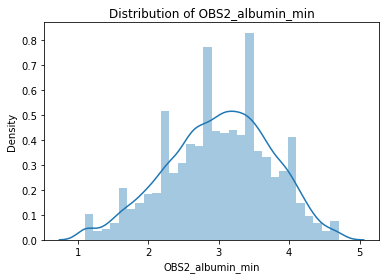

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of OBS2_albumin_min
sns.distplot(train_Laboratory_Findings['OBS2_albumin_min'].dropna(), kde=True, bins=30)
plt.title('Distribution of OBS2_albumin_min')
plt.xlabel('OBS2_albumin_min')
plt.ylabel('Density')
plt.show()

In [11]:
# Checking for outliers in each column of the train_Laboratory_Findings dataframe
# Outliers are checked using the IQR method

Q1 = train_Laboratory_Findings.quantile(0.25)
Q3 = train_Laboratory_Findings.quantile(0.75)
IQR = Q3 - Q1

# Calculating the number of outliers in each column
outliers_count = ((train_Laboratory_Findings < (Q1 - 1.5 * IQR)) | (train_Laboratory_Findings > (Q3 + 1.5 * IQR))).sum()

# Displaying the number of outliers in each column
outliers_count

id                         0
OBS1_albumin_max           0
OBS1_albumin_min           0
OBS2_albumin_max           0
OBS2_albumin_min           0
OBS1_bilirubin_max      4067
OBS1_bilirubin_min      4152
OBS2_bilirubin_max       768
OBS2_bilirubin_min       766
OBS1_bun_max            7025
OBS1_bun_min            6829
OBS2_bun_max            1762
OBS2_bun_min            1757
OBS1_creatinine_max    10124
OBS1_creatinine_min     9606
OBS2_creatinine_max     2242
OBS2_creatinine_min     2238
OBS1_glucose_max        6034
OBS1_glucose_min        4289
OBS2_glucose_max        3496
OBS2_glucose_min        3414
OBS1_hematocrit_max        0
OBS1_hematocrit_min        0
OBS2_hematocrit_max        0
OBS2_hematocrit_min        0
OBS1_sodium_max         2559
OBS1_sodium_min         2670
OBS2_sodium_max         1670
OBS2_sodium_min          976
dtype: int64

In [12]:
# Dropping outliers for each column in the train_Laboratory_Findings dataframe using the IQR method

# Calculating Q1, Q3, and IQR for each column
Q1 = train_Laboratory_Findings.quantile(0.25)
Q3 = train_Laboratory_Findings.quantile(0.75)
IQR = Q3 - Q1

# Dropping outliers from each column individually
for column in train_Laboratory_Findings.columns:
    # Finding the indices of outliers for each column
    outliers_indices = train_Laboratory_Findings[(train_Laboratory_Findings[column] < (Q1[column] - 1.5 * IQR[column])) | (train_Laboratory_Findings[column] > (Q3[column] + 1.5 * IQR[column]))].index
    # Dropping the outliers based on indices
    train_Laboratory_Findings = train_Laboratory_Findings.drop(outliers_indices)

# Displaying the first few rows of the dataframe after dropping outliers from each column
train_Laboratory_Findings.head()

,id,OBS1_albumin_max,OBS1_albumin_min,OBS2_albumin_max,OBS2_albumin_min,OBS1_bilirubin_max,OBS1_bilirubin_min,OBS2_bilirubin_max,OBS2_bilirubin_min,OBS1_bun_max,...,OBS2_glucose_max,OBS2_glucose_min,OBS1_hematocrit_max,OBS1_hematocrit_min,OBS2_hematocrit_max,OBS2_hematocrit_min,OBS1_sodium_max,OBS1_sodium_min,OBS2_sodium_max,OBS2_sodium_min
0,246060,1.6,1.6,NaN,NaN,0.5,0.5,NaN,NaN,11.0,...,145.0,143.0,36.9,36.1,36.9,36.9,145.0,145.0,145.0,145.0
1,276985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,262220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,34.0,25.9,34.0,34.0,NaN,NaN,NaN,NaN
3,201746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,182697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,44.2,44.2,NaN,NaN,137.0,137.0,NaN,NaN


In [13]:
# Assuming train_Laboratory_Findings_cleaned is the dataframe after dropping outliers
# Calculating the missing value rate for each column in the cleaned data
missing_value_rate_cleaned = train_Laboratory_Findings.isnull().mean() * 100

# Displaying the missing value rate for each column in the cleaned dataframe
missing_value_rate_cleaned

id                      0.000000
OBS1_albumin_max       60.726961
OBS1_albumin_min       60.726961
OBS2_albumin_max       92.908483
OBS2_albumin_min       92.908483
OBS1_bilirubin_max     64.222111
OBS1_bilirubin_min     64.222111
OBS2_bilirubin_max     93.436343
OBS2_bilirubin_min     93.436343
OBS1_bun_max           13.331027
OBS1_bun_min           13.331027
OBS2_bun_max           82.608807
OBS2_bun_min           82.608807
OBS1_creatinine_max    12.859541
OBS1_creatinine_min    12.859541
OBS2_creatinine_max    82.452499
OBS2_creatinine_min    82.452499
OBS1_glucose_max        8.377856
OBS1_glucose_min        8.377856
OBS2_glucose_max       61.256102
OBS2_glucose_min       61.256102
OBS1_hematocrit_max    13.478367
OBS1_hematocrit_min    13.478367
OBS2_hematocrit_max    79.363493
OBS2_hematocrit_min    79.363493
OBS1_sodium_max        12.963319
OBS1_sodium_min        12.963319
OBS2_sodium_max        80.264186
OBS2_sodium_min        80.264186
dtype: float64

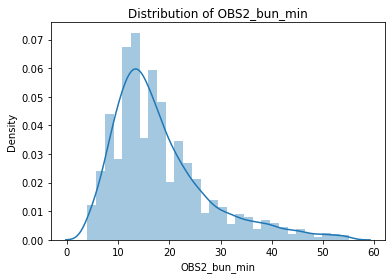

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the "OBS2_bun_min" feature
sns.distplot(train_Laboratory_Findings["OBS2_bun_min"].dropna(), kde=True, bins=30)
plt.title('Distribution of OBS2_bun_min')
plt.xlabel('OBS2_bun_min')
plt.ylabel('Density')
plt.show()

In [15]:
# Imputing missing values with the mean for each column in the dataframe
train_Laboratory_Findings.fillna(train_Laboratory_Findings.mean(), inplace=True)

In [16]:
train_Laboratory_Findings.isnull().sum()

id                     0
OBS1_albumin_max       0
OBS1_albumin_min       0
OBS2_albumin_max       0
OBS2_albumin_min       0
OBS1_bilirubin_max     0
OBS1_bilirubin_min     0
OBS2_bilirubin_max     0
OBS2_bilirubin_min     0
OBS1_bun_max           0
OBS1_bun_min           0
OBS2_bun_max           0
OBS2_bun_min           0
OBS1_creatinine_max    0
OBS1_creatinine_min    0
OBS2_creatinine_max    0
OBS2_creatinine_min    0
OBS1_glucose_max       0
OBS1_glucose_min       0
OBS2_glucose_max       0
OBS2_glucose_min       0
OBS1_hematocrit_max    0
OBS1_hematocrit_min    0
OBS2_hematocrit_max    0
OBS2_hematocrit_min    0
OBS1_sodium_max        0
OBS1_sodium_min        0
OBS2_sodium_max        0
OBS2_sodium_min        0
dtype: int64

In [17]:
import pandas as pd

# Reading the train_Medical_History.csv file into train_Medical_History dataframe
train_Medical_History = pd.read_csv('./data (1)/data/Training/train_Medical_History.csv')
train_Medical_History.head()

,id,hiv_aids_status,chronic_liver_disease,liver_function_impaired,immune_compromise,blood_cancer,lymphatic_cancer,advanced_solid_tumor
0,246060.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,276985.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,262220.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,201746.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,182697.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [18]:
train_Medical_History.isnull().sum()


id                         0
hiv_aids_status            0
chronic_liver_disease      0
liver_function_impaired    0
immune_compromise          0
blood_cancer               0
lymphatic_cancer           0
advanced_solid_tumor       0
dtype: int64

In [19]:
import pandas as pd

# Reading the train_Vital_Signs.csv file into train_Vital_Signs dataframe
train_Vital_Signs = pd.read_csv('./data (1)/data/Training/train_Vital_Signs.csv')
train_Vital_Signs.head()

,id,OBS1_hrate_max,OBS1_hrate_min,OBS2_hrate_max,OBS2_hrate_min,OBS1_reprate_max,OBS1_reprate_min,OBS2_reprate_max,OBS2_reprate_min,OBS1_sysb_max,...,OBS2_sysb_max,OBS2_sysb_min,OBS1_diasb_max,OBS1_diasb_min,OBS2_diasb_max,OBS2_diasb_min,OBS1_temper_max,OBS1_temper_min,OBS2_temper_max,OBS2_temper_min
0,246060,118.0,72.0,114.0,100.0,32.0,12.0,31.0,28.0,159.0,...,95.0,71.0,95.0,31.0,61.0,48.0,36.3,35.1,36.3,36.3
1,276985,96.0,68.0,96.0,78.0,21.0,8.0,20.0,16.0,148.0,...,148.0,124.0,88.0,48.0,88.0,58.0,37.0,36.7,36.7,36.7
2,262220,116.0,92.0,100.0,96.0,23.0,7.0,12.0,11.0,158.0,...,136.0,106.0,48.0,42.0,62.0,44.0,38.0,34.8,35.6,34.8
3,201746,89.0,60.0,89.0,76.0,18.0,16.0,NaN,NaN,147.0,...,130.0,120.0,99.0,57.0,99.0,68.0,37.2,36.7,NaN,NaN
4,182697,113.0,83.0,83.0,83.0,32.0,10.0,12.0,12.0,173.0,...,143.0,143.0,100.0,61.0,89.0,89.0,36.8,36.6,36.7,36.7


In [20]:
train_Vital_Signs.isnull().sum()

id                      0
OBS1_hrate_max        210
OBS1_hrate_min        210
OBS2_hrate_max       3222
OBS2_hrate_min       3222
OBS1_reprate_max      565
OBS1_reprate_min      565
OBS2_reprate_max     5129
OBS2_reprate_min     5129
OBS1_sysb_max         226
OBS1_sysb_min         226
OBS2_sysb_max        4411
OBS2_sysb_min        4411
OBS1_diasb_max        231
OBS1_diasb_min        231
OBS2_diasb_max       4418
OBS2_diasb_min       4418
OBS1_temper_max      3586
OBS1_temper_min      3586
OBS2_temper_max     23732
OBS2_temper_min     23732
dtype: int64

In [21]:
train_Vital_Signs.isnull().mean() * 100

id                   0.000000
OBS1_hrate_max       0.201681
OBS1_hrate_min       0.201681
OBS2_hrate_max       3.094358
OBS2_hrate_min       3.094358
OBS1_reprate_max     0.542617
OBS1_reprate_min     0.542617
OBS2_reprate_max     4.925810
OBS2_reprate_min     4.925810
OBS1_sysb_max        0.217047
OBS1_sysb_min        0.217047
OBS2_sysb_max        4.236255
OBS2_sysb_min        4.236255
OBS1_diasb_max       0.221849
OBS1_diasb_min       0.221849
OBS2_diasb_max       4.242977
OBS2_diasb_min       4.242977
OBS1_temper_max      3.443938
OBS1_temper_min      3.443938
OBS2_temper_max     22.791837
OBS2_temper_min     22.791837
dtype: float64

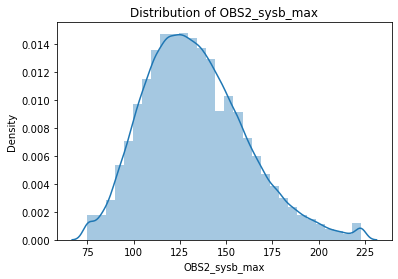

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of 'OBS2_sysb_max'
sns.distplot(train_Vital_Signs['OBS2_sysb_max'].dropna(), kde=True, bins=30)
plt.title('Distribution of OBS2_sysb_max')
plt.xlabel('OBS2_sysb_max')
plt.ylabel('Density')
plt.show()

In [23]:
# Replacing missing values with the mean for each column in train_Vital_Signs
train_Vital_Signs.fillna(train_Vital_Signs.mean(), inplace=True)

# Checking if there are any missing values left
train_Vital_Signs.isnull().sum()

id                  0
OBS1_hrate_max      0
OBS1_hrate_min      0
OBS2_hrate_max      0
OBS2_hrate_min      0
OBS1_reprate_max    0
OBS1_reprate_min    0
OBS2_reprate_max    0
OBS2_reprate_min    0
OBS1_sysb_max       0
OBS1_sysb_min       0
OBS2_sysb_max       0
OBS2_sysb_min       0
OBS1_diasb_max      0
OBS1_diasb_min      0
OBS2_diasb_max      0
OBS2_diasb_min      0
OBS1_temper_max     0
OBS1_temper_min     0
OBS2_temper_max     0
OBS2_temper_min     0
dtype: int64

In [24]:
import pandas as pd

# Reading the train_Target_data.csv file into train_Target_data dataframe
train_Target_data = pd.read_csv('./data (1)/data/Training/train_Target_data.csv')
train_Target_data.head()
train_Target_data.isnull().sum()

id                 0
fasting_ability    0
dtype: int64

In [25]:
# Assuming train_Demographics and train_Laboratory_Findings dataframes are already defined in your environment
# Merging all the train dataframes on the 'id' column
merged_train_data = pd.merge(train_Demographics, train_Laboratory_Findings, on='id', how='inner')
merged_train_data = pd.merge(merged_train_data, train_Medical_History, on='id', how='inner')
merged_train_data = pd.merge(merged_train_data, train_Vital_Signs, on='id', how='inner')
merged_train_data = pd.merge(merged_train_data, train_Target_data, on='id', how='inner')

merged_train_data.head()




,id,age_yrs,weight_kg,height_cm,body_mass_index,gender_identity_M,gender_identity_female,gender_identity_male,ethnic_group_African American,ethnic_group_Asian,...,OBS2_sysb_min,OBS1_diasb_max,OBS1_diasb_min,OBS2_diasb_max,OBS2_diasb_min,OBS1_temper_max,OBS1_temper_min,OBS2_temper_max,OBS2_temper_min,fasting_ability
0,246060.0,77.0,70.200000,160.0,27.421875,0,0,0,0,0,...,71.0,95.0,31.0,61.0,48.0,36.3,35.1,36.300000,36.300000,0
1,276985.0,25.0,95.300000,172.7,31.952749,0,0,0,0,0,...,124.0,88.0,48.0,88.0,58.0,37.0,36.7,36.700000,36.700000,1
2,262220.0,81.0,61.700000,165.1,22.635548,0,0,0,0,0,...,106.0,48.0,42.0,62.0,44.0,38.0,34.8,35.600000,34.800000,1
3,201746.0,19.0,83.801183,188.0,29.105144,1,0,0,0,0,...,120.0,99.0,57.0,99.0,68.0,37.2,36.7,36.722955,36.613913,1
4,182697.0,67.0,100.000000,190.5,27.555611,1,0,0,0,0,...,143.0,100.0,61.0,89.0,89.0,36.8,36.6,36.700000,36.700000,0


In [26]:
merged_train_data.dtypes

id                 float64
age_yrs            float64
weight_kg          float64
height_cm          float64
body_mass_index    float64
                    ...   
OBS1_temper_max    float64
OBS1_temper_min    float64
OBS2_temper_max    float64
OBS2_temper_min    float64
fasting_ability      int64
Length: 71, dtype: object

In [27]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Assuming 'merged_train_data' is your dataframe and 'fasting_ability' is the target variable
X = merged_train_data.drop('fasting_ability', axis=1)  # Features
y = merged_train_data['fasting_ability']  # Target variable

# Convert categorical variables to numeric using LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  # Naming the dataframe columns

# Saving the best features in a list
best_features_list = featureScores.nlargest(10,'Score')['Feature'].tolist()
best_features_list

['OBS1_glucose_max',
 'OBS2_glucose_max',
 'OBS2_glucose_min',
 'body_mass_index',
 'weight_kg',
 'OBS1_bun_max',
 'OBS1_creatinine_max',
 'OBS1_creatinine_min',
 'OBS1_bun_min',
 'age_yrs']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X[best_features_list], y, test_size = 0.2, random_state = 0)

# Creating a dictionary to store the accuracy of each model for comparison
# model_accuracies = {}

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print(accuracy_score(y_test, rf_predictions))

"""
# Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
print(accuracy_score(y_test, logreg_predictions))



# Support Vector Machine (SVM)

svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
model_accuracies['SVM'] = accuracy_score(y_test, svm_predictions)

# Displaying the accuracy of each model
model_accuracies"""

0.8410095445519186


"\n# Logistic Regression\n\nlogreg = LogisticRegression(max_iter=1000)\nlogreg.fit(X_train, y_train)\nlogreg_predictions = logreg.predict(X_test)\nprint(accuracy_score(y_test, logreg_predictions))\n\n\n\n# Support Vector Machine (SVM)\n\nsvm_classifier = SVC(kernel = 'linear', random_state = 0)\nsvm_classifier.fit(X_train, y_train)\nsvm_predictions = svm_classifier.predict(X_test)\nmodel_accuracies['SVM'] = accuracy_score(y_test, svm_predictions)\n\n# Displaying the accuracy of each model\nmodel_accuracies"

In [29]:
"""svm_classifier = SVC(kernel = 'linear', random_state = 0)
print("v1")
svm_classifier.fit(X_train, y_train)
print("training complete")
svm_predictions = svm_classifier.predict(X_test)
print(accuracy_score(y_test, svm_predictions))"""

'svm_classifier = SVC(kernel = \'linear\', random_state = 0)\nprint("v1")\nsvm_classifier.fit(X_train, y_train)\nprint("training complete")\nsvm_predictions = svm_classifier.predict(X_test)\nprint(accuracy_score(y_test, svm_predictions))'

In [30]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Assuming 'merged_train_data' is your dataframe and 'fasting_ability' is the target variable
X = merged_train_data.drop('fasting_ability', axis=1)  # Features
y = merged_train_data['fasting_ability']  # Target variable

# Convert categorical variables to numeric using LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=f_classif, k=15)  # Change k to 15
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  # Naming the dataframe columns

# Saving the best features in a list
best_features_list = featureScores.nlargest(15,'Score')['Feature'].tolist()  # Change 'nlargest' to 15
best_features_list


['OBS1_glucose_max',
 'OBS2_glucose_max',
 'OBS2_glucose_min',
 'body_mass_index',
 'weight_kg',
 'OBS1_bun_max',
 'OBS1_creatinine_max',
 'OBS1_creatinine_min',
 'OBS1_bun_min',
 'age_yrs',
 'OBS1_glucose_min',
 'OBS2_diasb_min',
 'OBS1_hematocrit_max',
 'OBS1_sysb_max',
 'OBS1_hematocrit_min']

In [31]:
"""from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X[best_features_list], y, test_size = 0.2, random_state = 0)

# Creating a dictionary to store the accuracy of each model for comparison
# model_accuracies = {}

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print(accuracy_score(y_test, rf_predictions))"""

'from sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVC\n\n# Splitting the dataset into the Training set and Test set\nX_train, X_test, y_train, y_test = train_test_split(X[best_features_list], y, test_size = 0.2, random_state = 0)\n\n# Creating a dictionary to store the accuracy of each model for comparison\n# model_accuracies = {}\n\n# Random Forest Classifier\nrf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)\nrf_classifier.fit(X_train, y_train)\nrf_predictions = rf_classifier.predict(X_test)\nprint(accuracy_score(y_test, rf_predictions))'

In [32]:
"""
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# Define a reduced parameter grid
param_grid = {
    'n_estimators': [100, 200],           # Reduced number of trees in the forest
    'max_depth': [None, 10],               # Reduced maximum depth of the trees
    'min_samples_split': [2, 5],           # Reduced minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]             # Reduced minimum number of samples required to be at a leaf node
}


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\n# Define a reduced parameter grid\nparam_grid = {\n    \'n_estimators\': [100, 200],           # Reduced number of trees in the forest\n    \'max_depth\': [None, 10],               # Reduced maximum depth of the trees\n    \'min_samples_split\': [2, 5],           # Reduced minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2]             # Reduced minimum number of samples required to be at a leaf node\n}\n\n\n# Create a Random Forest classifier\nrf_classifier = RandomForestClassifier(random_state=0)\n\n# Perform grid search with cross-validation\ngrid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(X_train, y_train)\n\n# Print the best parameters and best score\nbest_params=grid_search.best_params_\nbest_score=grid_search.best_score_\nprint("Best Parameters:", best_params)\nprint("Best Accuracy:"

In [33]:
"""from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X[best_features_list], y, test_size = 0.2, random_state = 0)

# Creating a dictionary to store the accuracy of each model for comparison
# model_accuracies = {}

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state = 0, max_depth= 10 , min_samples_split=5, min_samples_leaf=2)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print(accuracy_score(y_test, rf_predictions))
"""

'from sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVC\n\n# Splitting the dataset into the Training set and Test set\nX_train, X_test, y_train, y_test = train_test_split(X[best_features_list], y, test_size = 0.2, random_state = 0)\n\n# Creating a dictionary to store the accuracy of each model for comparison\n# model_accuracies = {}\n\n# Random Forest Classifier\nrf_classifier = RandomForestClassifier(n_estimators = 200, random_state = 0, max_depth= 10 , min_samples_split=5, min_samples_leaf=2)\nrf_classifier.fit(X_train, y_train)\nrf_predictions = rf_classifier.predict(X_test)\nprint(accuracy_score(y_test, rf_predictions))\n'

In [34]:
# cleaning the test data
test_Demographics = pd.read_csv('./data (1)/data/Testing/test_Demographics.csv')
test_Demographics.head() 
test_Demographics.shape

(26032, 7)

In [35]:
test_Demographics.isnull().sum()

id                    0
age_yrs            1009
ethnic_group        326
gender_identity      11
weight_kg           676
height_cm           441
body_mass_index     905
dtype: int64

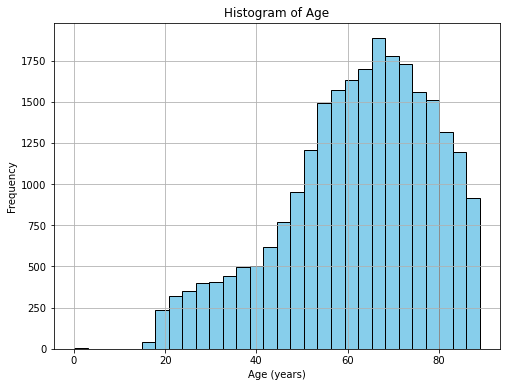

In [36]:
import matplotlib.pyplot as plt

# Plot histogram of the 'age_yrs' feature
plt.figure(figsize=(8, 6))
plt.hist(test_Demographics['age_yrs'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [37]:
# Replace missing values in 'age_yrs' with the mean
mean_age = test_Demographics['age_yrs'].mean()
test_Demographics['age_yrs'] = test_Demographics['age_yrs'].fillna(mean_age)


In [38]:
test_Demographics.isnull().sum()

id                   0
age_yrs              0
ethnic_group       326
gender_identity     11
weight_kg          676
height_cm          441
body_mass_index    905
dtype: int64

In [39]:
test_Demographics.head()

,id,age_yrs,ethnic_group,gender_identity,weight_kg,height_cm,body_mass_index
0,214826,68.0,Caucasian,M,73.9,180.3,22.732803
1,190593,68.0,Caucasian,M,82.2,172.7,27.560503
2,244158,45.0,Caucasian,M,116.6,190.5,32.129842
3,238278,71.0,Caucasian,M,121.7,177.8,38.497016
4,198305,65.0,African American,M,78.4,172.7,26.286417


In [40]:
# Assuming 'columns_to_delete' is a list of column names you want to delete


# Deleting the specified columns from the DataFrame
test_Demographics.drop(columns=[ 'ethnic_African American', 'ethnic_Asian', 'ethnic_Caucasian','ethnic_Caucasian', 'ethnic_Native American','ethnic_Other/Unknown'], inplace=True)



KeyError: "['ethnic_African American' 'ethnic_Asian' 'ethnic_Caucasian'\n 'ethnic_Caucasian' 'ethnic_Native American' 'ethnic_Other/Unknown'] not found in axis"

In [41]:
test_Demographics.head()

,id,age_yrs,ethnic_group,gender_identity,weight_kg,height_cm,body_mass_index
0,214826,68.0,Caucasian,M,73.9,180.3,22.732803
1,190593,68.0,Caucasian,M,82.2,172.7,27.560503
2,244158,45.0,Caucasian,M,116.6,190.5,32.129842
3,238278,71.0,Caucasian,M,121.7,177.8,38.497016
4,198305,65.0,African American,M,78.4,172.7,26.286417


In [ ]:
test_Demographics.drop(columns=['ethnic_Hispanic'], inplace=True)


In [42]:
test_Demographics.head()

,id,age_yrs,ethnic_group,gender_identity,weight_kg,height_cm,body_mass_index
0,214826,68.0,Caucasian,M,73.9,180.3,22.732803
1,190593,68.0,Caucasian,M,82.2,172.7,27.560503
2,244158,45.0,Caucasian,M,116.6,190.5,32.129842
3,238278,71.0,Caucasian,M,121.7,177.8,38.497016
4,198305,65.0,African American,M,78.4,172.7,26.286417


In [43]:
# Convert 'ethnic_group' to a numerical feature using pandas get_dummies
test_Demographics = pd.get_dummies(test_Demographics, columns=['ethnic_group'], drop_first=True)

# Display the first few rows to verify the transformation
test_Demographics.head()
test_Demographics.shape

(26032, 11)

In [44]:
test_Demographics['gender_identity'].values


array(['M', 'M', 'M', ..., 'M', 'F', 'M'], dtype=object)

In [45]:
# Mapping 'M' to 1 and 'F' to 0 in the 'gender_identity' column
test_Demographics['gender_identity'] = test_Demographics['gender_identity'].map({'M': 1, 'F': 0})


In [46]:
test_Demographics.head()


,id,age_yrs,gender_identity,weight_kg,height_cm,body_mass_index,ethnic_group_Asian,ethnic_group_Caucasian,ethnic_group_Hispanic,ethnic_group_Native American,ethnic_group_Other/Unknown
0,214826,68.0,1.0,73.9,180.3,22.732803,0,1,0,0,0
1,190593,68.0,1.0,82.2,172.7,27.560503,0,1,0,0,0
2,244158,45.0,1.0,116.6,190.5,32.129842,0,1,0,0,0
3,238278,71.0,1.0,121.7,177.8,38.497016,0,1,0,0,0
4,198305,65.0,1.0,78.4,172.7,26.286417,0,0,0,0,0


In [47]:
test_Demographics.isnull().sum()

id                                0
age_yrs                           0
gender_identity                  11
weight_kg                       676
height_cm                       441
body_mass_index                 905
ethnic_group_Asian                0
ethnic_group_Caucasian            0
ethnic_group_Hispanic             0
ethnic_group_Native American      0
ethnic_group_Other/Unknown        0
dtype: int64

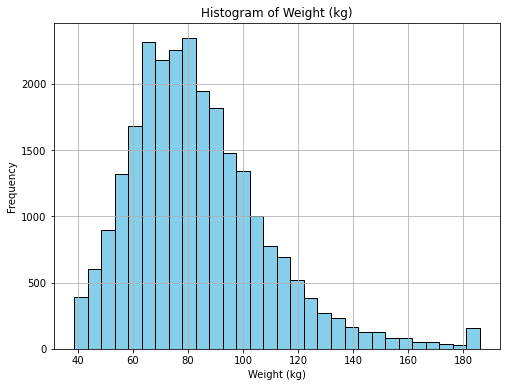

In [48]:
import matplotlib.pyplot as plt

# Plot histogram of the 'weight_kg' feature
plt.figure(figsize=(8, 6))
plt.hist(test_Demographics['weight_kg'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [49]:
# Calculate the mean of the 'weight_kg' column
mean_weight = test_Demographics['weight_kg'].mean()

# Replace missing values in 'weight_kg' with the mean
test_Demographics['weight_kg'].fillna(mean_weight, inplace=True)

test_Demographics.shape

(26032, 11)

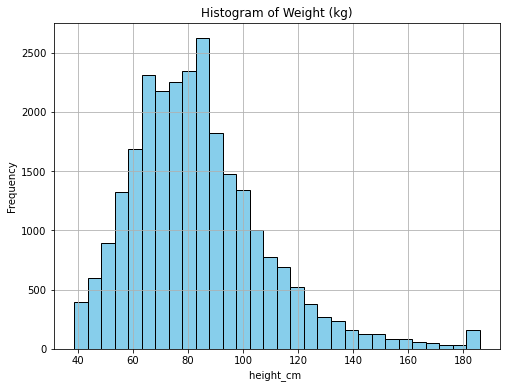

In [50]:
import matplotlib.pyplot as plt

# Plot histogram of the 'weight_kg' feature
plt.figure(figsize=(8, 6))
plt.hist(test_Demographics['weight_kg'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Weight (kg)')
plt.xlabel('height_cm ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [51]:
# Calculate the mean of the 'height_cm' column
mean_height= test_Demographics['height_cm'].mean()

# Replace missing values in 'height_cm' with the mean
test_Demographics['height_cm'].fillna(mean_height, inplace=True)

In [52]:
test_Demographics.isnull().sum()

id                                0
age_yrs                           0
gender_identity                  11
weight_kg                         0
height_cm                         0
body_mass_index                 905
ethnic_group_Asian                0
ethnic_group_Caucasian            0
ethnic_group_Hispanic             0
ethnic_group_Native American      0
ethnic_group_Other/Unknown        0
dtype: int64

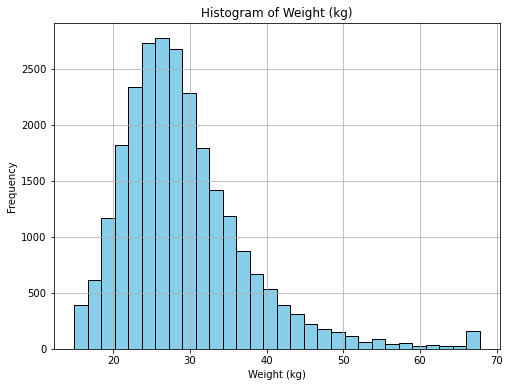

In [53]:
import matplotlib.pyplot as plt

# Plot histogram of the 'weight_kg' feature
plt.figure(figsize=(8, 6))
plt.hist(test_Demographics['body_mass_index'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [54]:
# Calculate the mean of the 'height_cm' column
mean_height= test_Demographics['body_mass_index'].mean()

# Replace missing values in 'height_cm' with the mean
test_Demographics['body_mass_index'].fillna(mean_height, inplace=True)

In [55]:
test_Demographics.isnull().sum()

id                               0
age_yrs                          0
gender_identity                 11
weight_kg                        0
height_cm                        0
body_mass_index                  0
ethnic_group_Asian               0
ethnic_group_Caucasian           0
ethnic_group_Hispanic            0
ethnic_group_Native American     0
ethnic_group_Other/Unknown       0
dtype: int64

In [56]:
test_Demographics.isnull().sum()

id                               0
age_yrs                          0
gender_identity                 11
weight_kg                        0
height_cm                        0
body_mass_index                  0
ethnic_group_Asian               0
ethnic_group_Caucasian           0
ethnic_group_Hispanic            0
ethnic_group_Native American     0
ethnic_group_Other/Unknown       0
dtype: int64

In [73]:
# Calculate the most frequent value in the 'gender_identity' column
most_frequent_gender = test_Demographics['gender_identity'].mode()[0]

# Replace missing values in the 'gender_identity' column with the most frequent value
test_Demographics['gender_identity'].fillna(most_frequent_gender, inplace=True) 



In [74]:
test_Demographics.isnull().sum()
test_Demographics.shape

(26032, 11)

In [75]:
test_Laboratory_Findings=pd.read_csv('./data (1)/data/Testing/test_Laboratory_Findings.csv')
test_Laboratory_Findings.head() 
test_Laboratory_Findings.shape

(26032, 29)

In [76]:
test_Laboratory_Findings.isnull().sum()

id                         0
OBS1_albumin_max       14258
OBS1_albumin_min       14258
OBS2_albumin_max       23857
OBS2_albumin_min       23857
OBS1_bilirubin_max     15286
OBS1_bilirubin_min     15286
OBS2_bilirubin_max     24015
OBS2_bilirubin_min     24015
OBS1_bun_max            2765
OBS1_bun_min            2765
OBS2_bun_max           21093
OBS2_bun_min           21093
OBS1_creatinine_max     2676
OBS1_creatinine_min     2676
OBS2_creatinine_max    21034
OBS2_creatinine_min    21034
OBS1_glucose_max        1643
OBS1_glucose_min        1643
OBS2_glucose_max       14934
OBS2_glucose_min       14934
OBS1_hematocrit_max     3110
OBS1_hematocrit_min     3110
OBS2_hematocrit_max    20627
OBS2_hematocrit_min    20627
OBS1_sodium_max         2672
OBS1_sodium_min         2672
OBS2_sodium_max        20407
OBS2_sodium_min        20407
dtype: int64

In [61]:
# Calculate the percentage of missing values in each column
missing_values_percentage = (test_Laboratory_Findings.isnull().mean() * 100).round(2)

# Display the missing values percentage for each column
print("Missing Values Percentage:")
print(missing_values_percentage)
test_Laboratory_Findings.shape

Missing Values Percentage:
id                      0.00
OBS1_albumin_max       54.77
OBS1_albumin_min       54.77
OBS2_albumin_max       91.64
OBS2_albumin_min       91.64
OBS1_bilirubin_max     58.72
OBS1_bilirubin_min     58.72
OBS2_bilirubin_max     92.25
OBS2_bilirubin_min     92.25
OBS1_bun_max           10.62
OBS1_bun_min           10.62
OBS2_bun_max           81.03
OBS2_bun_min           81.03
OBS1_creatinine_max    10.28
OBS1_creatinine_min    10.28
OBS2_creatinine_max    80.80
OBS2_creatinine_min    80.80
OBS1_glucose_max        6.31
OBS1_glucose_min        6.31
OBS2_glucose_max       57.37
OBS2_glucose_min       57.37
OBS1_hematocrit_max    11.95
OBS1_hematocrit_min    11.95
OBS2_hematocrit_max    79.24
OBS2_hematocrit_min    79.24
OBS1_sodium_max        10.26
OBS1_sodium_min        10.26
OBS2_sodium_max        78.39
OBS2_sodium_min        78.39
dtype: float64


(26032, 29)

In [77]:
# Replace missing values in each column with the mean of that column
test_Laboratory_Findings.fillna(test_Laboratory_Findings.mean(), inplace=True)
test_Laboratory_Findings.shape

(26032, 29)

In [78]:
test_Laboratory_Findings.isnull().sum()
test_Laboratory_Findings.shape 

(26032, 29)

In [79]:
# Calculate the percentage of missing values in each column
missing_values_percentage = (test_Laboratory_Findings.isnull().mean() * 100).round(2)

# Display the missing values percentage for each column
print("Missing Values Percentage:")
print(missing_values_percentage)

Missing Values Percentage:
id                     0.0
OBS1_albumin_max       0.0
OBS1_albumin_min       0.0
OBS2_albumin_max       0.0
OBS2_albumin_min       0.0
OBS1_bilirubin_max     0.0
OBS1_bilirubin_min     0.0
OBS2_bilirubin_max     0.0
OBS2_bilirubin_min     0.0
OBS1_bun_max           0.0
OBS1_bun_min           0.0
OBS2_bun_max           0.0
OBS2_bun_min           0.0
OBS1_creatinine_max    0.0
OBS1_creatinine_min    0.0
OBS2_creatinine_max    0.0
OBS2_creatinine_min    0.0
OBS1_glucose_max       0.0
OBS1_glucose_min       0.0
OBS2_glucose_max       0.0
OBS2_glucose_min       0.0
OBS1_hematocrit_max    0.0
OBS1_hematocrit_min    0.0
OBS2_hematocrit_max    0.0
OBS2_hematocrit_min    0.0
OBS1_sodium_max        0.0
OBS1_sodium_min        0.0
OBS2_sodium_max        0.0
OBS2_sodium_min        0.0
dtype: float64


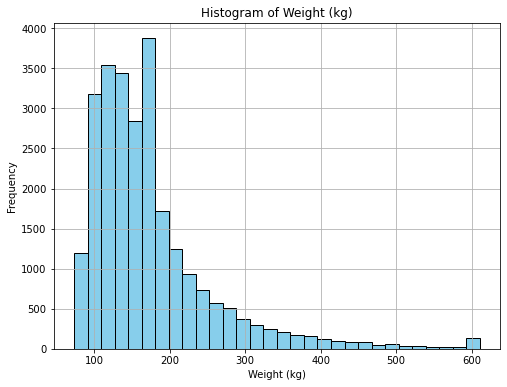

In [87]:
import matplotlib.pyplot as plt

# Plot histogram of the 'weight_kg' feature
plt.figure(figsize=(8, 6))
plt.hist(test_Laboratory_Findings['OBS1_glucose_max'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [88]:
# Calculate the mean of the 'height_cm' column
mean_height= test_Laboratory_Findings['OBS1_glucose_max'].mean()

# Replace missing values in 'height_cm' with the mean
test_Laboratory_Findings['OBS1_glucose_max'].fillna(mean_height, inplace=True)

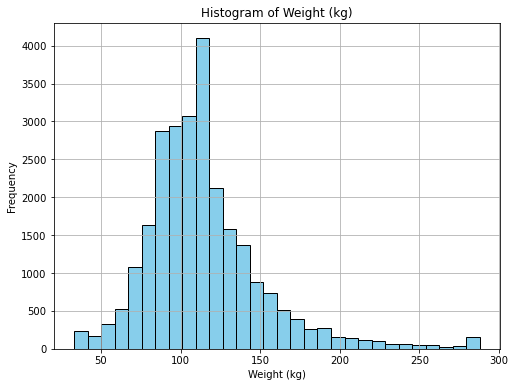

In [90]:
import matplotlib.pyplot as plt

# Plot histogram of the 'weight_kg' feature
plt.figure(figsize=(8, 6))
plt.hist(test_Laboratory_Findings['OBS1_glucose_min'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [94]:
# Calculate the mean of the 'height_cm' column
mean_height= test_Laboratory_Findings['OBS1_glucose_min'].mean()

# Replace missing values in 'height_cm' with the mean
test_Laboratory_Findings['OBS1_glucose_min'].fillna(mean_height, inplace=True)

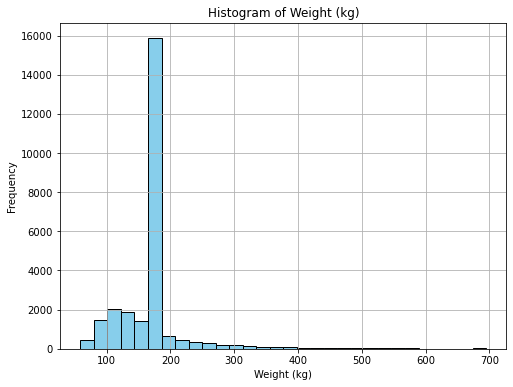

In [93]:
import matplotlib.pyplot as plt

# Plot histogram of the 'weight_kg' feature
plt.figure(figsize=(8, 6))
plt.hist(test_Laboratory_Findings['OBS2_glucose_max'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [95]:
# Calculate the mean of the 'height_cm' column
mean_height= test_Laboratory_Findings['OBS2_glucose_max'].mean()

# Replace missing values in 'height_cm' with the mean
test_Laboratory_Findings['OBS2_glucose_max'].fillna(mean_height, inplace=True)

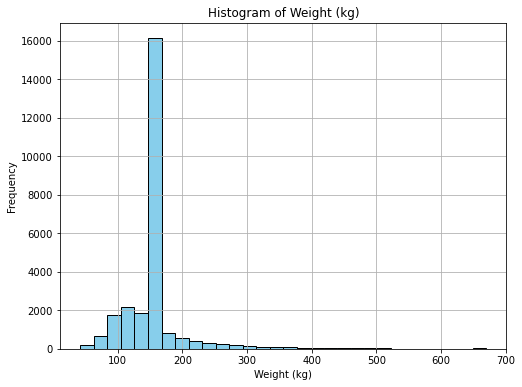

In [85]:
import matplotlib.pyplot as plt

# Plot histogram of the 'weight_kg' feature
plt.figure(figsize=(8, 6))
plt.hist(test_Laboratory_Findings['OBS2_glucose_min'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the mean of the 'height_cm' column
mean_height= test_Laboratory_Findings['OBS2_glucose_min'].mean()

# Replace missing values in 'height_cm' with the mean
test_Laboratory_Findings['OBS2_glucose_min'].fillna(mean_height, inplace=True)

In [96]:
test_Laboratory_Findings.isnull().sum()
test_Laboratory_Findings.shape

(26032, 29)

In [97]:
test_Medical_History=pd.read_csv('./data (1)/data/Testing/test_Medical_History.csv')
test_Medical_History.head()
test_Laboratory_Findings.shape,test_Medical_History.shape

((26032, 29), (26032, 8))

In [98]:
test_Medical_History.isnull().sum()

id                         0
hiv_aids_status            0
chronic_liver_disease      0
liver_function_impaired    0
immune_compromise          0
blood_cancer               0
lymphatic_cancer           0
advanced_solid_tumor       0
dtype: int64

In [100]:
test_Vital_Signs=pd.read_csv('./data (1)/data/Testing/test_Vital_Signs.csv')
test_Vital_Signs.head(),test_Vital_Signs.shape


(       id  OBS1_hrate_max  OBS1_hrate_min  OBS2_hrate_max  OBS2_hrate_min  \
 0  214826           119.0            72.0           119.0           108.0   
 1  190593            90.0            57.0            69.0            65.0   
 2  244158           132.0            84.0           126.0           122.0   
 3  238278            96.0            70.0            88.0            82.0   
 4  198305           132.0            96.0           132.0           120.0   
 
    OBS1_reprate_max  OBS1_reprate_min  OBS2_reprate_max  OBS2_reprate_min  \
 0              34.0              10.0              26.0              18.0   
 1              39.0               9.0              25.0               9.0   
 2              27.0              14.0              27.0              16.0   
 3              59.0               4.0              30.0              28.0   
 4              44.0               0.0              44.0              10.0   
 
    OBS1_sysb_max  ...  OBS2_sysb_max  OBS2_sysb_min  OBS1_d

In [101]:
test_Vital_Signs.isnull().sum()





id                     0
OBS1_hrate_max        52
OBS1_hrate_min        52
OBS2_hrate_max       852
OBS2_hrate_min       852
OBS1_reprate_max     118
OBS1_reprate_min     118
OBS2_reprate_max    1325
OBS2_reprate_min    1325
OBS1_sysb_max         45
OBS1_sysb_min         45
OBS2_sysb_max       1108
OBS2_sysb_min       1108
OBS1_diasb_max        46
OBS1_diasb_min        46
OBS2_diasb_max      1109
OBS2_diasb_min      1109
OBS1_temper_max      908
OBS1_temper_min      908
OBS2_temper_max     5971
OBS2_temper_min     5971
dtype: int64

In [102]:
# Calculate the percentage of missing values in each column
missing_values_percentage = (test_Vital_Signs.isnull().mean() * 100).round(2)

# Display the missing values percentage for each column
print("Missing Values Percentage:")
print(missing_values_percentage)

Missing Values Percentage:
id                   0.00
OBS1_hrate_max       0.20
OBS1_hrate_min       0.20
OBS2_hrate_max       3.27
OBS2_hrate_min       3.27
OBS1_reprate_max     0.45
OBS1_reprate_min     0.45
OBS2_reprate_max     5.09
OBS2_reprate_min     5.09
OBS1_sysb_max        0.17
OBS1_sysb_min        0.17
OBS2_sysb_max        4.26
OBS2_sysb_min        4.26
OBS1_diasb_max       0.18
OBS1_diasb_min       0.18
OBS2_diasb_max       4.26
OBS2_diasb_min       4.26
OBS1_temper_max      3.49
OBS1_temper_min      3.49
OBS2_temper_max     22.94
OBS2_temper_min     22.94
dtype: float64


In [103]:

# Replace missing values in all columns with the mean of each column
test_Vital_Signs = test_Vital_Signs.fillna(test_Vital_Signs.mean())
test_Vital_Signs.shape

(26032, 21)

In [104]:
test_Vital_Signs.isnull().sum()

id                  0
OBS1_hrate_max      0
OBS1_hrate_min      0
OBS2_hrate_max      0
OBS2_hrate_min      0
OBS1_reprate_max    0
OBS1_reprate_min    0
OBS2_reprate_max    0
OBS2_reprate_min    0
OBS1_sysb_max       0
OBS1_sysb_min       0
OBS2_sysb_max       0
OBS2_sysb_min       0
OBS1_diasb_max      0
OBS1_diasb_min      0
OBS2_diasb_max      0
OBS2_diasb_min      0
OBS1_temper_max     0
OBS1_temper_min     0
OBS2_temper_max     0
OBS2_temper_min     0
dtype: int64

In [ ]:
# Assuming train_Demographics and train_Laboratory_Findings dataframes are already defined in your environment
# Merging all the train dataframes on the 'id' column
merged_test_data = pd.merge(test_Demographics, test_Laboratory_Findings, on='id', how='inner')
merged_test_data = pd.merge(merged_test_data, test_Medical_History, on='id', how='inner')
merged_test_data = pd.merge(merged_test_data, test_Vital_Signs, on='id', how='inner')


merged_test_data.head()
merged_test_data.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

# Prepare input features (X) and target variable (y) from merged_train_data
X_train = merged_train_data[best_features_list]
y_train = merged_train_data['fasting_ability']

# Train the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Prepare input features (X_evaluation) from merged_test_data
X_evaluation = merged_test_data[best_features_list]

# Predict fasting abilities for IDs in merged_test_data
y_predict = logistic_reg.predict(X_evaluation)

# Create a new DataFrame with 'id' and predicted 'fasting_ability'
predictions_df = pd.DataFrame({'id': merged_test_data['id'], 'fasting_ability': y_predict})

# Save the new DataFrame to a CSV file
predictions_df.to_csv('predicted_fasting_ability_logistic_regression.csv', index=False)




In [ ]:
merged_train_data.shape,merged_test_data.shape

In [ ]:
"""from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=0)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)"""
